In [ ]:
#General Imports
import io
import numpy as np
import pandas as pd
import pickle
from os.path import join

# Text Processing Imports
from nltk.stem import WordNetLemmatizer
import gensim.parsing.preprocessing as gpp
import gensim.utils as gu
import nltk
nltk.download('wordnet')  # Downloading the wordnet data for lemmatization

 # For character encoding detection
import chardet

 # For KNN imputation of missing data
from sklearn.impute import KNNImputer

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
data = pd.read_csv("sentiment.csv",encoding='unicode_escape')

<ipython-input-2-fbbbde74943d>:1: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("sentiment.csv",encoding='unicode_escape')


In [ ]:
data.shape

(171380, 6)

In [ ]:

# Drop duplicates
#data.drop_duplicates(inplace=True)

# Drop rows with missing values
data.dropna(inplace=True)

In [ ]:
data.shape

(171379, 6)

In [ ]:
data.Sentiment.value_counts()

positive    111103
negative     41956
neutral      13692
Negative      4163
Neutral        446
Positive        19
Name: Sentiment, dtype: int64

In [ ]:
pip install contractions


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 11.8 MB/s eta 0:00:00


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import contractions

nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Expand contractions
    text = contractions.fix(text)
    # Lowercasing
    text = text.lower()
    # Remove punctuation, special characters, numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenization
    words = text.split()
    # Remove stopwords and lemmatize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords.words('english')]
    return ' '.join(words)


# Apply preprocessing to textual columns
data['ProductName'] = data['ProductName'].apply(preprocess_text)
data['Summary'] = data['Summary'].apply(preprocess_text)
data['Review'] = data['Review'].apply(preprocess_text)
data['Sentiment'] = data['Sentiment'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
new_df = data.copy()

In [ ]:
new_df.to_csv('my_data.csv', index=False)

In [ ]:
data.Sentiment.value_counts()

positive    111122
negative     46119
neutral      14138
Name: Sentiment, dtype: int64

In [ ]:
new_df['Rate'] = new_df['Rate'].astype(str).str.strip()
new_df = new_df[new_df['Rate'].str.isnumeric()]
new_df['Rate'] = new_df['Rate'].astype(float)

# Use .loc to avoid SettingWithCopyWarning
new_df.loc[:, 'Rate'] = new_df['Rate'].apply(lambda x: int(x) if x.is_integer() else x)

# Now the 'Rate' column should only contain integers 1 through 5
print(new_df['Rate'].unique())

# Since 'Rate' is now a numeric column, we can't use .str.contains, and we don't need to if we've already cleaned non-numeric entries
# But if you still need to remove entries with a specific string in another column, you would convert that column to string and then use .contains
# For example, if you have a 'ProductName' column and want to remove a specific product:
new_df = new_df[~new_df['ProductName'].astype(str).str.contains("Pigeon Favourite Electric Kettle")]

# Confirm the unique values in the 'Rate' column
print(new_df['Rate'].unique())

[5 3 1 4 2]
[5 3 1 4 2]


<ipython-input-7-8fe5178fdc14>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Rate'] = new_df['Rate'].astype(float)
<ipython-input-7-8fe5178fdc14>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  new_df.loc[:, 'Rate'] = new_df['Rate'].apply(lambda x: int(x) if x.is_integer() else x)


In [ ]:
new_df.head(5)

,ProductName,ProductPrice,Rate,Review,Summary,Sentiment
0,candes l roompersonal air coolerwhite black el...,3999,5,super,great cooler excellent air flow price amazing ...,positive
1,candes l roompersonal air coolerwhite black el...,3999,5,awesome,best budget fit cooler nice cooling,positive
2,candes l roompersonal air coolerwhite black el...,3999,3,fair,quality good power air decent,positive
3,candes l roompersonal air coolerwhite black el...,3999,1,useless product,bad product fan,negative
4,candes l roompersonal air coolerwhite black el...,3999,3,fair,ok ok product,neutral


In [ ]:
data["Sentiment"].value_counts()

positive    111122
negative     46119
neutral      14138
Name: Sentiment, dtype: int64

Here please classify sentimnet text short long meduim based on summary coloum because i have only added summary column

In [ ]:
glove_embeddings = {}

# Open the GloVe embeddings file
with open('/content/glove.6B.100d.txt', 'r', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        glove_embeddings[word] = vector

print(f'Loaded {len(glove_embeddings)} word vectors.')

Loaded 48870 word vectors.


In [ ]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=10000)  # Adjust 'num_words' based on your dataset
texts = new_df['Summary'].tolist()  # Replace with your actual dataset
tokenizer.fit_on_texts(texts)

# Set embedding dimension (based on your GloVe vectors)
embedding_dimension = 100

# Retrieve the word index from the tokenizer
word_index = tokenizer.word_index

# Initialize embedding matrix
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dimension))

# Fill the embedding matrix with GloVe vectors
for word, i in word_index.items():
    if i < 10000:  # Assuming you're using the top 10,000 tokens
        embedding_vector = glove_embeddings.get(word)
        if embedding_vector is not None:
            # Words not found in the embedding index will be all zeros
            embedding_matrix[i] = embedding_vector

# Now 'embedding_matrix' is ready to be used in your model

In [ ]:
print("Word Index Length:", len(word_index))
print("Embedding Matrix Shape:", embedding_matrix.shape)


Word Index Length: 29814
Embedding Matrix Shape: (29815, 100)


In [ ]:
# Example words
sample_words = ["", "word"]
for word in sample_words:
    idx = word_index.get(word)
    if idx is not None and idx < 10000:
        print(f"Word: {word}, Vector: {embedding_matrix[idx][:10]}")  # Print first 10 elements of the vector
    else:
        print(f"Word: {word} not found in top 10000 tokens or in GloVe embeddings.")

Word:  not found in top 10000 tokens or in GloVe embeddings.
Word: word, Vector: [ 0.1233      0.55741     0.74203002 -0.06547    -0.33485001  0.81541002
 -0.16384    -1.03269994  0.41834    -0.012764  ]


In [ ]:
known_word = "example"  # Replace with a word you expect to find in GloVe
idx = word_index.get(known_word, None)
if idx is not None and np.any(embedding_matrix[idx]):
    print(f"Vector for '{known_word}' is correctly set.")
else:
    print(f"Vector for '{known_word}' is not set or word not found.")

# Checking an unknown word
unknown_word = "someunlikelyword"  # Replace with a word you expect not to find
idx = word_index.get(unknown_word, None)
if idx is not None and not np.any(embedding_matrix[idx]):
    print(f"Vector for '{unknown_word}' is correctly set to zeros.")
else:
    print(f"Vector for '{unknown_word}' has non-zero values or word not found.")

Vector for 'example' is correctly set.
Vector for 'someunlikelyword' has non-zero values or word not found.


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight

# Tokenize the text
tokenizer = Tokenizer(num_words=10000)  # Adjust 'num_words' as needed
tokenizer.fit_on_texts(new_df['Summary'])
sequences = tokenizer.texts_to_sequences(new_df['Summary'])

# Pad the sequences
max_length = max([len(seq) for seq in sequences])
X = pad_sequences(sequences, maxlen=max_length)

# Convert labels to numerical values (0, 1, 2)
y = new_df['Sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2}).values

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Convert class weights to a dictionary
class_weight_dict = dict(enumerate(class_weights))

# Print the class weights
print(class_weight_dict)


# Convert labels to one-hot encoded format
y_train_one_hot = to_categorical(y_train, num_classes=3)
y_val_one_hot = to_categorical(y_val, num_classes=3)

# Now, you can use X_train, y_train_one_hot for training
# and X_val, y_val_one_hot for validation in your model training process.



{0: 1.2243468573359266, 1: 4.0100792582623, 2: 0.5170988132841214}


In [ ]:
for i in range(5):  # Print the first 5 samples as an example
    print(f"Sample {i + 1}:")
    print("Tokenized Sequence:", X_train[i])
    print("Sentiment Label:", y_train_one_hot[i])
    print()

Sample 1:
Tokenized Sequence: [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0 131]
Sentiment Label: [0. 1. 0.]

Sample 2:
Tokenized Sequence: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Sentiment Label: [0. 0. 1.]

Sample 3:
Tokenized Sequence: [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  19
   2 258  12 101  24]
Sentiment Label: [1. 0. 0.]

Sample 4:
Tokenized Sequence: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    2    1  816  521   12  429  192   46   20  521   12
  254  187    1  715  187   28   20  377   17   

In [ ]:
for i in range(5):
    print(f"Sample {i + 1}:")
    print(f"Tokenized Sequence: {X[i]}")
    print(f"Sentiment Label: {y[i]}")

Sample 1:
Tokenized Sequence: [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  32  52  26
  67 379  11  42  45]
Sentiment Label: 2
Sample 2:
Tokenized Sequence: [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   8
 168 135  52   3  60]
Sentiment Label: 2
Sample 3:
Tokenized Sequence: [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   4   1 153  67 274]
Sentiment Label: 2
Sample 4:
Tokenized Sequence: [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0

In [ ]:
X.shape


(131071, 59)

AttributeError: ignored

In [ ]:
max_length = 100
X_train_padded = pad_sequences(X_train, maxlen=max_length)
X_val_padded = pad_sequences(X_val, maxlen=max_length)

In [ ]:
print("Shape of X_train_padded:", X_train_padded.shape)
print("Shape of X_val_padded:", X_val_padded.shape)


Shape of X_train_padded: (104856, 100)
Shape of X_val_padded: (26215, 100)


In [ ]:
from keras.models import Model
from keras.layers import Input, Embedding, Bidirectional, LSTM, Dense, Dropout

# Assuming 'max_length' is the maximum length of your input sequences
# and 'embedding_matrix' is the matrix you've prepared using GloVe embeddings
max_length = 100  # Adjust this based on your data
vocab_size = len(embedding_matrix)  # Vocabulary size
embedding_dim = 100  # Size of GloVe word vectors

# Input layer
input_layer = Input(shape=(max_length,))

# Embedding layer using GloVe embeddings
embedding_layer = Embedding(vocab_size, embedding_dim, weights=[embedding_matrix],
                            input_length=max_length, trainable=False)(input_layer)

# Bidirectional LSTM layer
lstm_layer = Bidirectional(LSTM(64, return_sequences=False))(embedding_layer)

# Dropout for regularization
dropout_layer = Dropout(0.5)(lstm_layer)

# Sentiment output layer (assuming 3 classes: Negative, Neutral, Positive)
sentiment_output = Dense(3, activation='softmax', name='sentiment_output')(dropout_layer)

# Building the model
model = Model(inputs=input_layer, outputs=sentiment_output)

# Compile the model with appropriate loss function for the output
# Compile the model with class weights
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use categorical_crossentropy for one-hot encoded labels
              metrics=['accuracy']
              )

# Summary of the model
model.summary()

history1=model.fit(X_train_padded, y_train_one_hot,
          #class_weight={0: 1.101127843236091, 1: 3.51135222021298, 2: 0.5533882203926536},
          epochs=10, batch_size=32, validation_data=(X_val_padded, y_val_one_hot))

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 100, 100)          3740400   
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               84480     
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 sentiment_output (Dense)    (None, 3)                 387       
                                                                 
Total params: 3825267 (14.59 MB)
Trainable params: 84867 (331.51 KB)
Non-trainable params: 3740400 (14.27 MB)
_______________

In [ ]:
np.unique(y_train)

array([0., 1.], dtype=float32)

1048/1048 [==============================] - 20s 19ms/step


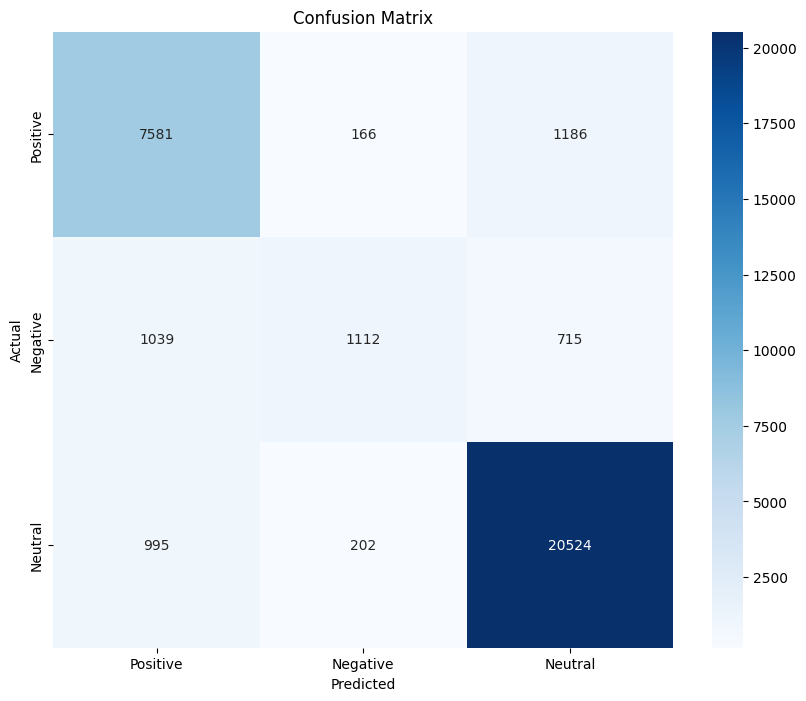

              precision    recall  f1-score   support

    Positive       0.79      0.85      0.82      8933
    Negative       0.75      0.39      0.51      2866
     Neutral       0.92      0.94      0.93     21721

    accuracy                           0.87     33520
   macro avg       0.82      0.73      0.75     33520
weighted avg       0.87      0.87      0.86     33520



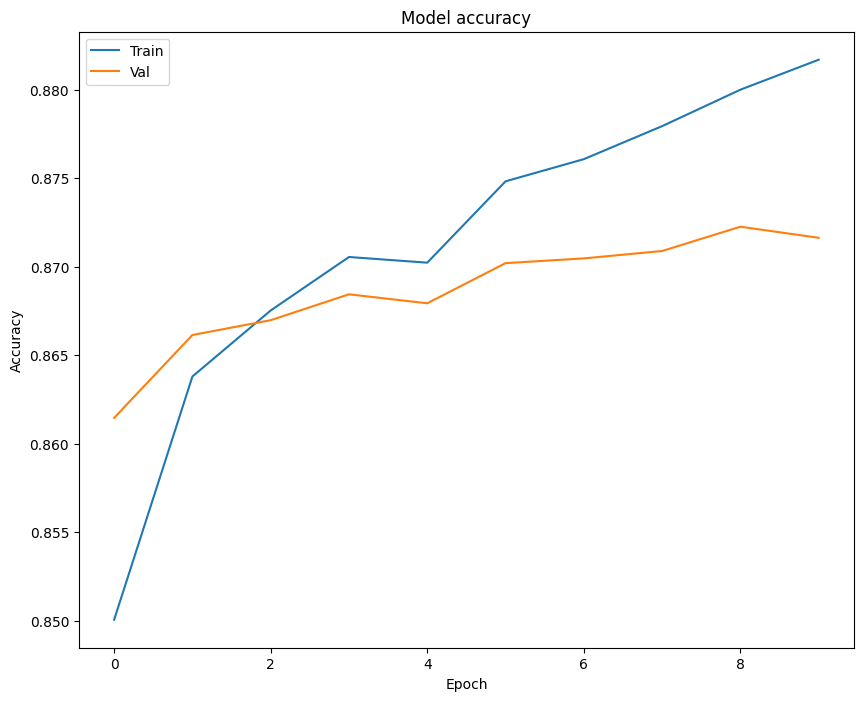

AttributeError: ignored

<Figure size 1000x800 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Predict the values from the validation dataset
y_pred = model.predict(X_val_padded)

# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert validation observations to one hot vectors
y_true = np.argmax(y_val_one_hot, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap="Blues", xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Print classification report for precision, recall, f1-score
print(classification_report(y_true, y_pred_classes, target_names=['Negative', 'Neutral', 'Positive']))

# Assuming you stored the history of your model training in the 'history' variable
# Plot the training & validation accuracy values
plt.figure(figsize=(10,8))
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot the training & validation loss values
plt.figure(figsize=(10,8))
plt.plot(history1.history1['loss'])
plt.plot(history1.history1['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [ ]:
def preprocess_text(text, tokenizer, max_length):
    # Convert text to sequence of integers
    sequence = tokenizer.texts_to_sequences([text])
    # Pad the sequence to the required input length
    padded_sequence = pad_sequences(sequence, maxlen=max_length)
    return padded_sequence

# Example usage:
new_text = "it exeeded my expectations ."
preprocessed_text = preprocess_text(new_text, tokenizer, max_length=100)

# Make a prediction
prediction = model.predict(preprocessed_text)
print("Predicted class:", np.argmax(prediction))  # Assuming you have a classification task

1/1 [==============================] - 0s 58ms/step
Predicted class: 2


In [ ]:
model.save('BiLSTM.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


count    131071.000000
mean          3.510326
std           1.599171
min           1.000000
25%           2.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: Rate, dtype: float64


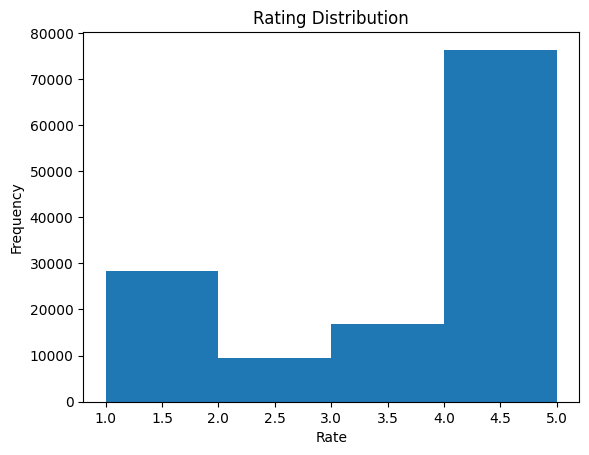

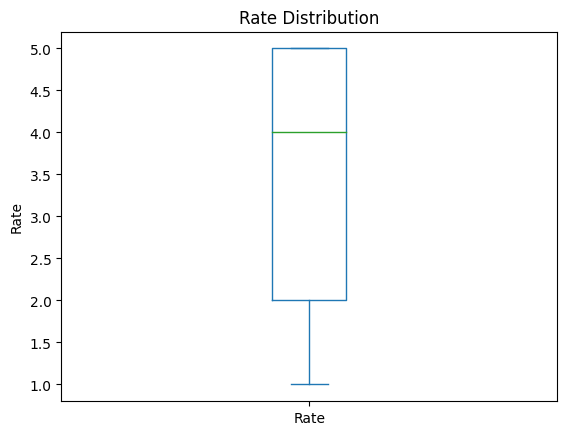

In [ ]:
import matplotlib.pyplot as plt
# Assuming 'df' is your DataFrame and 'rating' is the column with ratings
rating_distribution = new_df['Rate'].describe()

print(rating_distribution)

# Histogram
new_df['Rate'].plot(kind='hist', bins=range(1, 6))  # Adjust bins if necessary
plt.title('Rating Distribution')
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.show()

# Boxplot
new_df['Rate'].plot(kind='box')
plt.title('Rate Distribution')
plt.ylabel('Rate')
plt.show()


In [ ]:
from keras.models import Model
from keras.layers import Input, Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, Bidirectional

max_length = 100  # Adjust this based on your data
vocab_size = len(embedding_matrix)  # Vocabulary size
embedding_dim = 100  # Size of GloVe word vectors

input_layer = Input(shape=(max_length,))
embedding_layer = Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=max_length, trainable=False)(input_layer)

# 1D Convolutional Layer
conv_layer = Conv1D(filters=64, kernel_size=5, activation='relu')(embedding_layer)
pooling_layer = MaxPooling1D(pool_size=4)(conv_layer)

# First LSTM Layer (BiLSTM)
bi_lstm_layer = Bidirectional(LSTM(64, return_sequences=True))(pooling_layer)

# Second LSTM Layer
second_lstm_layer = LSTM(64)(bi_lstm_layer)

# Dense and Dropout layers
dense_layer = Dense(64, activation='relu')(second_lstm_layer)
dropout_layer = Dropout(0.5)(dense_layer)

# Output Layer
output_layer = Dense(3, activation='softmax')(dropout_layer)

# Building and compiling the model
cnn_model = Model(inputs=input_layer, outputs=output_layer)
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
cnn_model.summary()

# You can now proceed to train the model with your data
history=cnn_model.fit(X_train_padded, y_train_one_hot,
              class_weight= {0: 1.05, 1: 2.0, 2: 0.75},
              epochs=10, batch_size=32,
              validation_data=(X_val_padded, y_val_one_hot))

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding_5 (Embedding)     (None, 100, 100)          2981500   
                                                                 
 conv1d_5 (Conv1D)           (None, 96, 64)            32064     
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 24, 64)            0         
 g1D)                                                            
                                                                 
 bidirectional_4 (Bidirecti  (None, 24, 128)           66048     
 onal)                                                           
                                                                 
 lstm_7 (LSTM)               (None, 64)                4940